In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


file_name = 'ridehailing.csv'

In [2]:
df = pd.read_csv(file_name)
df = df.dropna(subset="Steps") # drop passenger agents
last_step = df[df["Step"] == 1440]

display(last_step)

,RunId,iteration,Step,num_drivers,size,waiting_time,multi_pass,seed_int,rate,total_steps,strategy,Manhattan,AgentID,Steps,IdleTime,sec_id,request_time,pickup_time,dropoff_time
5601,2,0,1440,1,15,NaN,False,11,10,1440,StepType.QUEUE,0,2,1292.0,12.0,NaN,NaN,NaN,NaN
10912,8,0,1440,1,15,NaN,False,111,10,1440,StepType.QUEUE,0,2,1262.0,40.0,NaN,NaN,NaN,NaN
16186,9,0,1440,1,15,NaN,False,121,10,1440,StepType.CLOSEST,0,2,1292.0,13.0,NaN,NaN,NaN,NaN
21579,10,0,1440,1,15,NaN,False,121,10,1440,StepType.WAITING,0,2,1279.0,23.0,NaN,NaN,NaN,NaN
27077,1,0,1440,1,15,NaN,False,11,10,1440,StepType.WAITING,0,2,1274.0,32.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832194,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,6,556.0,828.0,NaN,NaN,NaN,NaN
5832195,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,7,635.0,738.0,NaN,NaN,NaN,NaN
5832196,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,8,505.0,882.0,NaN,NaN,NaN,NaN
5832197,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,9,521.0,858.0,NaN,NaN,NaN,NaN


In [4]:
groups = last_step.groupby(["num_drivers", "strategy"])
steps_av = groups.mean()

steps_av["U_rate"]  = 100 - steps_av["IdleTime"] / 14.4 # divide by 1440 * 100 to get percentage
display(steps_av)

RunId  iteration    Step  size  waiting_time  \
num_drivers strategy                                                         
1           StepType.CLOSEST  313.5        2.0  1440.0  15.0           NaN   
            StepType.QUEUE    315.5        2.0  1440.0  15.0           NaN   
            StepType.WAITING  314.5        2.0  1440.0  15.0           NaN   
2           StepType.CLOSEST  343.5        2.0  1440.0  15.0           NaN   
            StepType.QUEUE    345.5        2.0  1440.0  15.0           NaN   
            StepType.WAITING  344.5        2.0  1440.0  15.0           NaN   
3           StepType.CLOSEST  373.5        2.0  1440.0  15.0           NaN   
            StepType.QUEUE    375.5        2.0  1440.0  15.0           NaN   
            StepType.WAITING  374.5        2.0  1440.0  15.0           NaN   
4           StepType.CLOSEST  403.5        2.0  1440.0  15.0           NaN   
            StepType.QUEUE    405.5        2.0  1440.0  15.0           NaN   
            StepType.WAITING  404.5        2.0  1440.0  15.0           NaN   
5           StepType.CLOSEST  433.5        2.0  1440.0  15.0           NaN   
            StepType.QUEUE    435.5        2.0  1440.0  15.0           NaN   
            StepType.WAITING  434.5        2.0  1440.0  15.0           NaN   

                              multi_pass  seed_int  rate  total_steps  \
num_drivers strategy                                                    
1           StepType.CLOSEST         0.0     225.2  10.0       1440.0   
            StepType.QUEUE           0.0     225.2  10.0       1440.0   
            StepType.WAITING         0.0     225.2  10.0       1440.0   
2           StepType.CLOSEST         0.0     225.2  10.0       1440.0   
            StepType.QUEUE           0.0     225.2  10.0       1440.0   
            StepType.WAITING         0.0     225.2  10.0       1440.0   
3           StepType.CLOSEST         0.0     225.2  10.0       1440.0   
            StepType.QUEUE           0.0     225.2  10.0       1440.0   
            StepType.WAITING         0.0     225.2  10.0       1440.0   
4           StepType.CLOSEST         0.0     225.2  10.0       1440.0   
            StepType.QUEUE           0.0     225.2  10.0       1440.0   
            StepType.WAITING         0.0     225.2  10.0       1440.0   
5           StepType.CLOSEST         0.0     225.2  10.0       1440.0   
            StepType.QUEUE           0.0     225.2  10.0       1440.0   
            StepType.WAITING         0.0     225.2  10.0       1440.0   

                              Manhattan  AgentID        Steps    IdleTime  \
num_drivers strategy                                                        
1           StepType.CLOSEST        0.0      2.0  1263.980000   31.500000   
            StepType.QUEUE          0.0      2.0  1274.720000   26.800000   
            StepType.WAITING        0.0      2.0  1232.820000   25.180000   
2           StepType.CLOSEST        0.0      3.5  1140.060000  177.480000   
            StepType.QUEUE          0.0      3.5  1152.410000  165.900000   
            StepType.WAITING        0.0      3.5  1142.980000  163.400000   
3           StepType.CLOSEST        0.0      5.0   857.413333  492.113333   
            StepType.QUEUE          0.0      5.0   865.266667  483.533333   
            StepType.WAITING        0.0      5.0   862.346667  486.920000   
4           StepType.CLOSEST        0.0      6.5   654.500000  716.165000   
            StepType.QUEUE          0.0      6.5   659.475000  711.055000   
            StepType.WAITING        0.0      6.5   659.630000  710.945000   
5           StepType.CLOSEST        0.0      8.0   529.584000  854.156000   
            StepType.QUEUE          0.0      8.0   531.472000  852.328000   
            StepType.WAITING        0.0      8.0   528.724000  855.252000   

                              sec_id  request_time  pickup_time  dropoff_time  \
num_drivers strategy                                                  

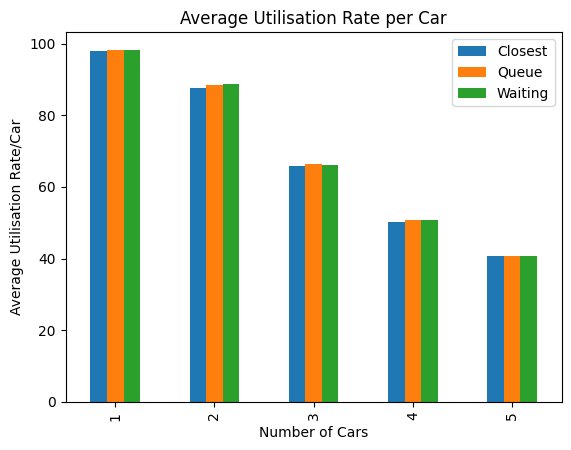

In [19]:
unstacked = steps_av.unstack()


ax = unstacked["U_rate"].plot(kind="bar", stacked=False)
ax.legend(['Closest', 'Queue', "Waiting"])


# for i, v in enumerate(unstacked["U_rate"].values):
#     # for j, h in v:
#     #     # print(j, j.size())
#     #     print(round(h, 2))
#     h = v[0]
#     ax.text(i, h + 0.01, str(round(h, 2)), ha="center", fontsize='xx-small')
#     ax.text(i, h + 0.01, str(round(h, 2)), ha="center", fontsize='xx-small')
#     ax.text(i, h + 0.01, str(round(h, 2)), ha="center", fontsize='xx-small')



plt.xlabel('Number of Drivers')
plt.ylabel('Average Utilisation Rate/Car')
plt.title('Average Utilisation Rate per Car')
plt.savefig('figures/u_rate.png')
